In [11]:
import pandas as pd 
import numpy as np 

### Data loading and model selection

In [12]:
df = pd.read_csv('../data/stock_data_preprocessed_unscaled.csv')
df.head()

,Date,Closing Price,Opening Price,High Price,Low Price,Volume,Percentage Change,MA10,MA50,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Volatility
0,2024-05-23,152.8,153.8,154.3,152.0,211370000.0,-1.10,153.52,154.050,152.6,155.8,153.8,152.0,152.2,1.290822
1,2024-05-22,154.5,154.8,156.1,153.9,220480000.0,0.85,153.72,154.014,152.8,152.6,155.8,153.8,152.0,1.269996
2,2024-05-21,153.2,153.0,153.3,152.3,206230000.0,0.92,153.62,153.870,154.5,152.8,152.6,155.8,153.8,1.267368
3,2024-05-20,151.8,152.0,154.4,151.5,357280000.0,0.00,153.30,153.732,153.2,154.5,152.8,152.6,155.8,1.284091
4,2024-05-17,151.8,152.0,156.5,151.6,417050000.0,-1.43,153.05,153.574,151.8,153.2,154.5,152.8,152.6,1.310852


In [13]:
# Sort the data by 'Date' in ascending order
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date').reset_index(drop=True)


In [14]:
df.head()

,Date,Closing Price,Opening Price,High Price,Low Price,Volume,Percentage Change,MA10,MA50,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Volatility
0,1987-02-12,182.4,182.4,182.4,182.4,1.280000e+09,16.25,206.97,259.906,172.5,175.5,182.4,191.2,196.1,34.525934
1,1987-02-13,172.5,176.5,176.5,172.5,4.223800e+08,-5.43,213.44,262.316,175.5,182.4,191.2,196.1,210.8,35.459655
2,1987-02-16,175.5,166.7,175.5,165.7,3.605100e+08,1.74,221.58,264.846,182.4,191.2,196.1,210.8,235.3,34.342743
3,1987-02-17,182.4,176.5,184.3,175.5,8.815100e+08,3.93,230.40,267.120,191.2,196.1,210.8,235.3,270.6,32.468138
4,1987-02-18,191.2,186.3,191.2,186.3,7.950900e+08,4.82,239.61,269.158,196.1,210.8,235.3,270.6,252.9,30.331848


Now the data is in ascending order according to the dates. We can go forward with model selection and training. 

### Model Selection

In [15]:

# Perform the Augmented Dickey-Fuller test to check stationarity on the 'Closing Price'
stock_data = df
from statsmodels.tsa.stattools import adfuller

# ADF test on 'Closing Price'
adf_result = adfuller(stock_data['Closing Price'])

# Extract the results
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

adf_statistic, p_value, critical_values


(-3.6301764848636093,
 0.005209644116798577,
 {'1%': -3.4310660523809275,
  '5%': -2.861856449258006,
  '10%': -2.56693844088655})

### ADF Test Results

#### ADF Statistic
- **Value**: -3.63

#### p-value
- **Value**: 0.0052

#### Critical Values
- **1%**: -3.43  
- **5%**: -2.86  
- **10%**: -2.57

### Interpretation
Since the ADF Statistic (-3.63) is lower than the critical values at all levels (1%, 5%, and 10%), and the p-value (0.0052) is less than 0.05, we can reject the null hypothesis of the ADF test.

### Conclusion
The data is stationary, which is a good sign for proceeding with an ARIMA model.


In [16]:
df

,Date,Closing Price,Opening Price,High Price,Low Price,Volume,Percentage Change,MA10,MA50,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Volatility
0,1987-02-12,182.4,182.4,182.4,182.4,1.280000e+09,16.25,206.97,259.906,172.5,175.5,182.4,191.2,196.1,34.525934
1,1987-02-13,172.5,176.5,176.5,172.5,4.223800e+08,-5.43,213.44,262.316,175.5,182.4,191.2,196.1,210.8,35.459655
2,1987-02-16,175.5,166.7,175.5,165.7,3.605100e+08,1.74,221.58,264.846,182.4,191.2,196.1,210.8,235.3,34.342743
3,1987-02-17,182.4,176.5,184.3,175.5,8.815100e+08,3.93,230.40,267.120,191.2,196.1,210.8,235.3,270.6,32.468138
4,1987-02-18,191.2,186.3,191.2,186.3,7.950900e+08,4.82,239.61,269.158,196.1,210.8,235.3,270.6,252.9,30.331848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9148,2024-05-17,151.8,152.0,156.5,151.6,4.170500e+08,-1.43,153.05,153.574,151.8,153.2,154.5,152.8,152.6,1.310852
9149,2024-05-20,151.8,152.0,154.4,151.5,3.572800e+08,0.00,153.30,153.732,153.2,154.5,152.8,152.6,155.8,1.284091
9150,2024-05-21,153.2,153.0,153.3,152.3,2.062300e+08,0.92,153.62,153.870,154.5,152.8,152.6,155.8,153.8,1.267368
9151,2024-05-22,154.5,154.8,156.1,153.9,2.204800e+08,0.85,153.72,154.014,152.8,152.6,155.8,153.8,152.0,1.269996


In [17]:
import matplotlib.pyplot as plt

c:\Users\Pranav\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE: 7.49564
MAE: 2.15056
R-Squared: 0.98927
MAPE: 1.52545%


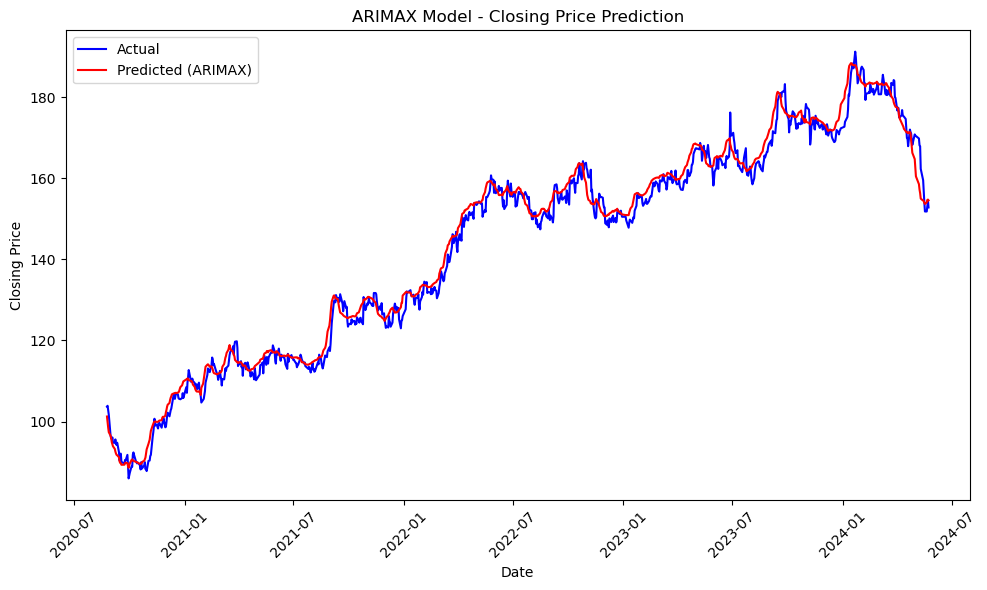

In [18]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split data into training and testing sets (90% train, 10% test)
train_size = int(len(stock_data) * 0.9)
train_data, test_data = stock_data['Closing Price'][:train_size], stock_data['Closing Price'][train_size:]

# Define exogenous variables (for example: Volume, MA10, Volatility)
exog_train = stock_data[['Volume', 'MA10', 'Volatility']][:train_size]
exog_test = stock_data[['Volume', 'MA10', 'Volatility']][train_size:]

# Fit ARIMAX model
model_arimax = ARIMA(train_data, exog=exog_train, order=(5, 0, 0))  # Adjust p, d, q accordingly
arimax_fit = model_arimax.fit()

# Make predictions using exogenous variables for the test set
arimax_predictions = arimax_fit.forecast(steps=len(test_data), exog=exog_test)
# Evaluate performance
mse_arimax = mean_squared_error(test_data, arimax_predictions)
mae_arimax = mean_absolute_error(test_data, arimax_predictions)
mape_arimax = np.mean(np.abs(arimax_predictions - test_data)/np.abs(test_data)) * 100  # Mean Absolute Percentage Error in percentage

# Calculate R-Squared
ss_res = np.sum((test_data - arimax_predictions) ** 2)
ss_tot = np.sum((test_data - np.mean(test_data)) ** 2)
rsq_arimax = 1 - (ss_res / ss_tot)

# Print evaluation metrics with 5 decimal places
print(f'MSE: {mse_arimax:.5f}')
print(f'MAE: {mae_arimax:.5f}')
print(f'R-Squared: {rsq_arimax:.5f}')
print(f'MAPE: {mape_arimax:.5f}%')

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(stock_data['Date'][train_size:], test_data, label='Actual', color='blue')
plt.plot(stock_data['Date'][train_size:], arimax_predictions, label='Predicted (ARIMAX)', color='red')
plt.title('ARIMAX Model - Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We can see that ARIMA with other features gave us good results. But We can't take Volume and Variability features, as they won't be available to us during predictions. 

Hence we try to do predictions using Lag. 

MSE: 2.61244
MAE: 1.21030
R-Squared: 0.99626
MAPE: 0.86611%


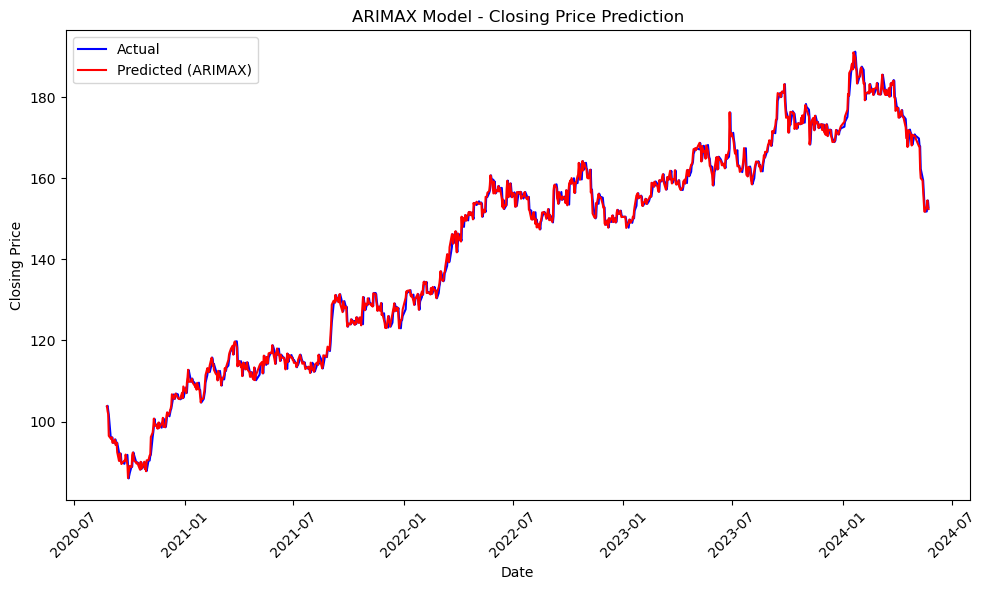

In [13]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split data into training and testing sets (90% train, 10% test)
train_size = int(len(stock_data) * 0.9)
train_data, test_data = stock_data['Closing Price'][:train_size], stock_data['Closing Price'][train_size:]

# Using lag features (e.g., Lag_1, Lag_2, ..., Lag_5) instead of moving averages and volatility
exog_train = stock_data[['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']][:train_size]
exog_test = stock_data[['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']][train_size:]

# Fit ARIMAX model with lagged features as exogenous variables
model_arimax = ARIMA(train_data, exog=exog_train, order=(5, 0, 0))  # Adjust p, d, q accordingly
arimax_fit = model_arimax.fit()

# Make predictions using exogenous variables for the test set
arimax_predictions = arimax_fit.forecast(steps=len(test_data), exog=exog_test)

# Evaluate performance
mse_arimax = mean_squared_error(test_data, arimax_predictions)
mae_arimax = mean_absolute_error(test_data, arimax_predictions)
mape_arimax = np.mean(np.abs(arimax_predictions - test_data) / np.abs(test_data)) * 100  # Mean Absolute Percentage Error in percentage

# Calculate R-Squared
ss_res = np.sum((test_data - arimax_predictions) ** 2)
ss_tot = np.sum((test_data - np.mean(test_data)) ** 2)
rsq_arimax = 1 - (ss_res / ss_tot)

# Print evaluation metrics with 5 decimal places
print(f'MSE: {mse_arimax:.5f}')
print(f'MAE: {mae_arimax:.5f}')
print(f'R-Squared: {rsq_arimax:.5f}')
print(f'MAPE: {mape_arimax:.5f}%')

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(stock_data['Date'][train_size:], test_data, label='Actual', color='blue')
plt.plot(stock_data['Date'][train_size:], arimax_predictions, label='Predicted (ARIMAX)', color='red')
plt.title('ARIMAX Model - Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### LSTM Model. 

Epoch 1/25
256/256 [==============================] - 17s 52ms/step - loss: 7056.1050
Epoch 2/25
256/256 [==============================] - 16s 63ms/step - loss: 5108.5684
Epoch 3/25
256/256 [==============================] - 13s 52ms/step - loss: 3885.1365
Epoch 4/25
256/256 [==============================] - 14s 54ms/step - loss: 3108.0083
Epoch 5/25
256/256 [==============================] - 13s 52ms/step - loss: 2641.0266
Epoch 6/25
256/256 [==============================] - 14s 53ms/step - loss: 2381.2327
Epoch 7/25
256/256 [==============================] - 13s 53ms/step - loss: 2133.6123
Epoch 8/25
256/256 [==============================] - 13s 52ms/step - loss: 1604.8607
Epoch 9/25
256/256 [==============================] - 14s 53ms/step - loss: 1318.9470
Epoch 10/25
256/256 [==============================] - 13s 52ms/step - loss: 1123.2179
Epoch 11/25
256/256 [==============================] - 13s 50ms/step - loss: 971.1234
Epoch 12/25
256/256 [==============================] 

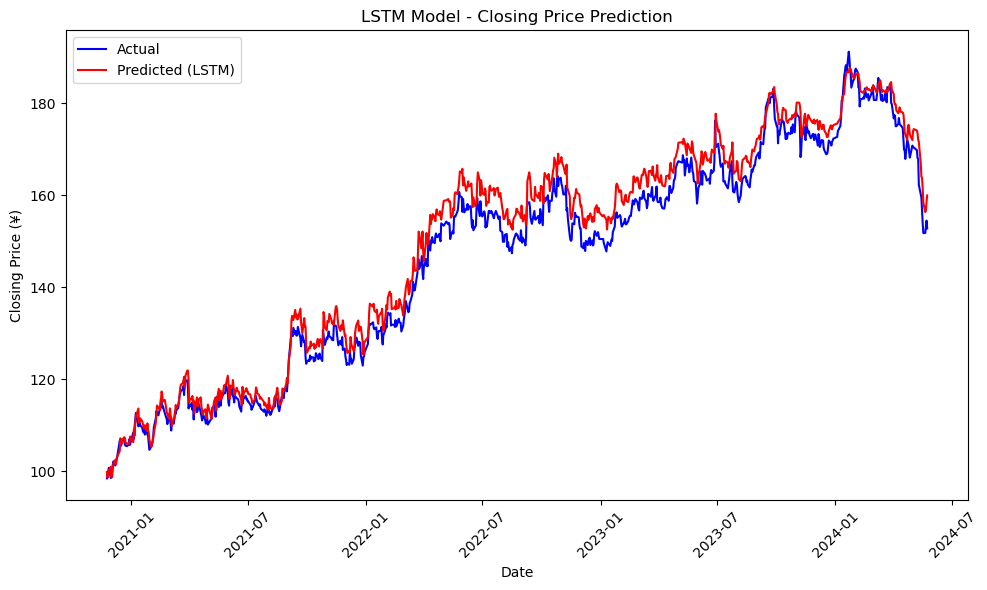

MSE: 15.99664
MAE: 3.46001
R-Squared: -1779.80784
MAPE: 19.93629%


In [14]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Prepare the data for LSTM
def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)

# Assuming 'df' is your DataFrame with the 'Date' and 'Closing Price' columns.
# Convert 'Closing Price' to numpy array
data = df['Closing Price'].values.reshape(-1, 1)

# Split data into training and testing sets
train_size = int(len(data) * 0.9)
train_data, test_data = data[:train_size], data[train_size:]

# Create the LSTM input dataset
time_step = 60
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# Reshaping input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=128, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(units=64))
model_lstm.add(Dense(1))

# Compile and train the LSTM model
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1)

# Predict on test data
lstm_predictions = model_lstm.predict(X_test)

# Calculate evaluation metrics for LSTM
mse_lstm = mean_squared_error(Y_test, lstm_predictions)
mae_lstm = mean_absolute_error(Y_test, lstm_predictions)
mape_lstm = np.mean(np.abs(lstm_predictions - Y_test) / np.abs(Y_test)) * 100  # Mean Absolute Percentage Error in percentage

# Calculate R-Squared
ss_res = np.sum((Y_test - lstm_predictions) ** 2)
ss_tot = np.sum((Y_test - np.mean(Y_test)) ** 2)
rsq_lstm = 1 - (ss_res / ss_tot)

# Plot the LSTM results
plt.figure(figsize=(10,6))
plt.plot(df['Date'][train_size+time_step:], Y_test, label='Actual', color='blue')
plt.plot(df['Date'][train_size+time_step:], lstm_predictions, label='Predicted (LSTM)', color='red')
plt.title('LSTM Model - Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price (¥)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print evaluation metrics with 5 decimal places
print(f'MSE: {mse_lstm:.5f}')
print(f'MAE: {mae_lstm:.5f}')
print(f'R-Squared: {rsq_lstm:.5f}')
print(f'MAPE: {mape_lstm:.5f}%')


Since LSTM overfits, let us use other techniques like dropout to avoid overfitting. 

### LSTM With Dropout. 

Epoch 1/15
205/205 [==============================] - 14s 52ms/step - loss: 7391.9248 - val_loss: 3501.7148
Epoch 2/15
205/205 [==============================] - 10s 49ms/step - loss: 5674.2808 - val_loss: 2290.1643
Epoch 3/15
205/205 [==============================] - 10s 50ms/step - loss: 4576.9253 - val_loss: 1461.9725
Epoch 4/15
205/205 [==============================] - 11s 52ms/step - loss: 3828.0637 - val_loss: 921.7036
Epoch 5/15
205/205 [==============================] - 10s 51ms/step - loss: 3334.2048 - val_loss: 589.8282
Epoch 6/15
205/205 [==============================] - 11s 55ms/step - loss: 2957.9502 - val_loss: 369.6558
Epoch 7/15
205/205 [==============================] - 10s 50ms/step - loss: 2588.9448 - val_loss: 223.0107
Epoch 8/15
205/205 [==============================] - 10s 50ms/step - loss: 2182.1848 - val_loss: 78.7746
Epoch 9/15
205/205 [==============================] - 10s 50ms/step - loss: 1871.4497 - val_loss: 19.0772
Epoch 10/15
205/205 [===============

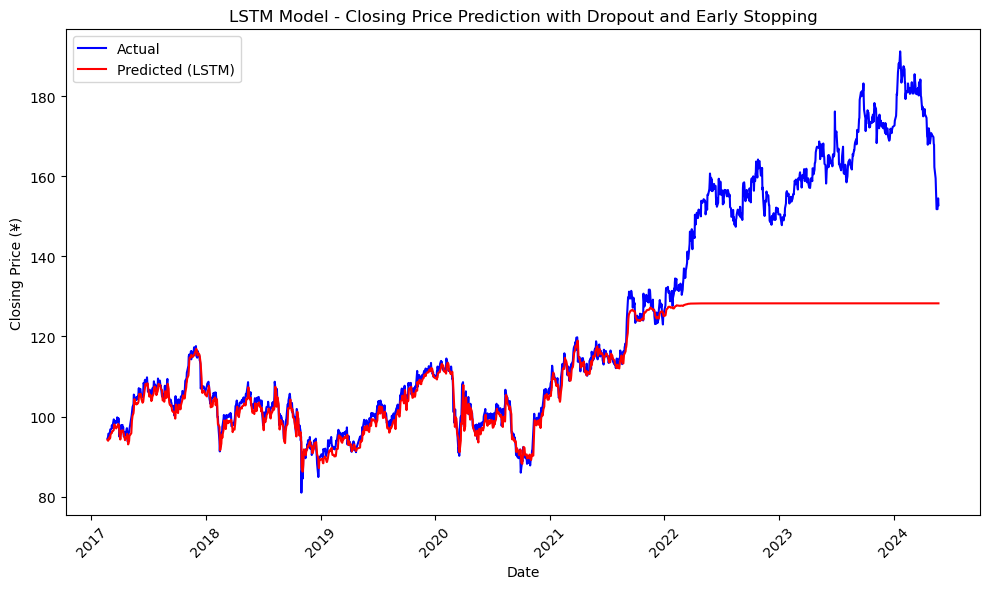

MSE: 403.44134
MAE: 11.63750
R-Squared: -2469.55361
MAPE: 19.38880%


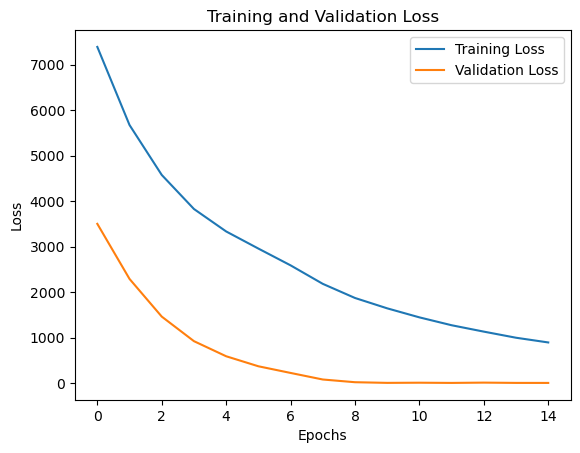

In [22]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Prepare the data for LSTM
def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)


data = df['Closing Price'].values.reshape(-1, 1)

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Create the LSTM input dataset
time_step = 60
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# Reshaping input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model with Dropout
model_lstm = Sequential()
model_lstm.add(LSTM(units=128, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(Dropout(0.1))  # Adding Dropout layer after first LSTM layer
model_lstm.add(LSTM(units=64))
model_lstm.add(Dropout(0.1))  # Adding Dropout layer after second LSTM layer
model_lstm.add(Dense(1))

# Compile the LSTM model
model_lstm.compile(loss='mean_squared_error', optimizer='adam')

# Early stopping callback to stop training if validation loss does not improve for 3 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the LSTM model with Early Stopping
history = model_lstm.fit(X_train, Y_train, epochs=15, batch_size=32, validation_split=0.1, verbose=1, callbacks=[early_stopping])

# Predict on test data
lstm_predictions = model_lstm.predict(X_test)

# Calculate evaluation metrics for LSTM
mse_lstm = mean_squared_error(Y_test, lstm_predictions)
mae_lstm = mean_absolute_error(Y_test, lstm_predictions)
mape_lstm = np.mean(np.abs(lstm_predictions - Y_test) / np.abs(Y_test)) * 100  # Mean Absolute Percentage Error in percentage

# Calculate R-Squared
ss_res = np.sum((Y_test - lstm_predictions) ** 2)
ss_tot = np.sum((Y_test - np.mean(Y_test)) ** 2)
rsq_lstm = 1 - (ss_res / ss_tot)

# Plot the LSTM results
plt.figure(figsize=(10,6))
plt.plot(df['Date'][train_size+time_step:], Y_test, label='Actual', color='blue')
plt.plot(df['Date'][train_size+time_step:], lstm_predictions, label='Predicted (LSTM)', color='red')
plt.title('LSTM Model - Closing Price Prediction with Dropout and Early Stopping')
plt.xlabel('Date')
plt.ylabel('Closing Price (¥)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print evaluation metrics with 5 decimal places
print(f'MSE: {mse_lstm:.5f}')
print(f'MAE: {mae_lstm:.5f}')
print(f'R-Squared: {rsq_lstm:.5f}')
print(f'MAPE: {mape_lstm:.5f}%')

# Plot the training and validation loss to analyze overfitting
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/15
256/256 [==============================] - 12s 36ms/step - loss: 6731.1118
Epoch 2/15
256/256 [==============================] - 9s 36ms/step - loss: 4894.0293
Epoch 3/15
256/256 [==============================] - 9s 35ms/step - loss: 3731.7329
Epoch 4/15
256/256 [==============================] - 9s 35ms/step - loss: 2988.8767
Epoch 5/15
256/256 [==============================] - 9s 35ms/step - loss: 2366.2207
Epoch 6/15
256/256 [==============================] - 9s 35ms/step - loss: 1913.2313
Epoch 7/15
256/256 [==============================] - 9s 35ms/step - loss: 1590.7450
Epoch 8/15
256/256 [==============================] - 9s 35ms/step - loss: 1354.9846
Epoch 9/15
256/256 [==============================] - 9s 37ms/step - loss: 1173.8632
Epoch 10/15
256/256 [==============================] - 9s 35ms/step - loss: 1026.7819
Epoch 11/15
256/256 [==============================] - 10s 38ms/step - loss: 901.0643
Epoch 12/15
256/256 [==============================] - 9s 37ms

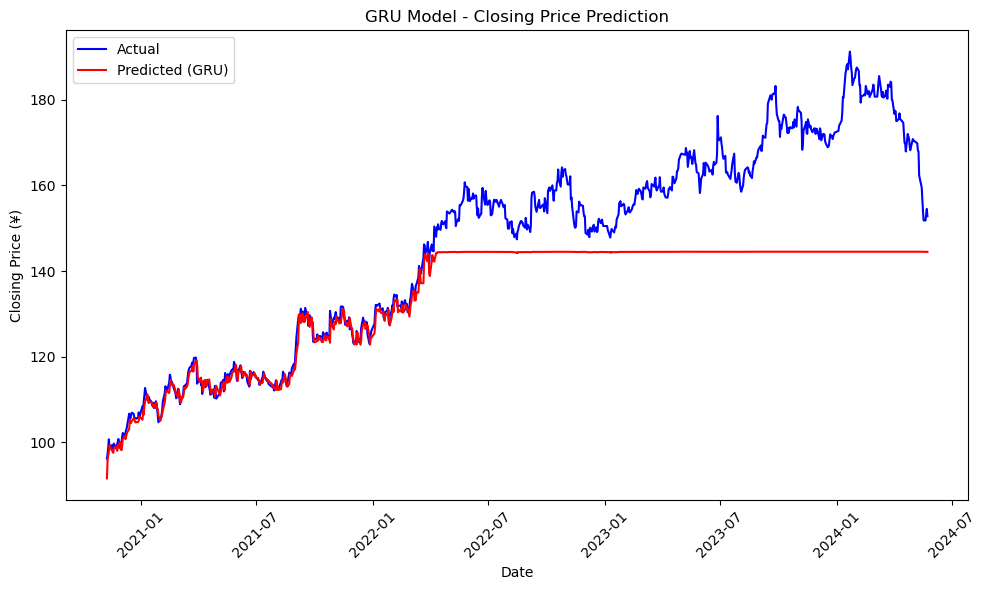

MSE: 286.28202
MAE: 11.97902
R-Squared: -1374.37896
MAPE: 17.44420%


In [24]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, GRU
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Prepare the data for GRU
def create_dataset(data, time_step=10):
    X, Y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)

# Assuming 'df' is your DataFrame with the 'Date' and 'Closing Price' columns
# Convert 'Closing Price' to a numpy array
data = df['Closing Price'].values.reshape(-1, 1)

# Split data into training and testing sets
train_size = int(len(data) * 0.9)
train_data, test_data = data[:train_size], data[train_size:]

# Create the GRU input dataset
time_step = 50
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# Reshaping input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build GRU model
model_gru = Sequential()
model_gru.add(GRU(units=128, return_sequences=True, input_shape=(time_step, 1)))
model_gru.add(GRU(units=64))
model_gru.add(Dense(1))

# Compile and train the GRU model
model_gru.compile(loss='mean_squared_error', optimizer='adam')
model_gru.fit(X_train, Y_train, epochs=15, batch_size=32, verbose=1)

# Predict on test data
gru_predictions = model_gru.predict(X_test)
# Calculate evaluation metrics for GRU
mse_gru = mean_squared_error(Y_test, gru_predictions)
mae_gru = mean_absolute_error(Y_test, gru_predictions)
mape_gru = np.mean(np.abs(gru_predictions - Y_test) / np.abs(Y_test)) * 100  # Mean Absolute Percentage Error in percentage

# Calculate R-Squared
ss_res = np.sum((Y_test - gru_predictions) ** 2)
ss_tot = np.sum((Y_test - np.mean(Y_test)) ** 2)
rsq_gru = 1 - (ss_res / ss_tot)

# Plot the GRU results
plt.figure(figsize=(10,6))
plt.plot(df['Date'][train_size+time_step:], Y_test, label='Actual', color='blue')
plt.plot(df['Date'][train_size+time_step:], gru_predictions, label='Predicted (GRU)', color='red')
plt.title('GRU Model - Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price (¥)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print evaluation metrics with 5 decimal places
print(f'MSE: {mse_gru:.5f}')
print(f'MAE: {mae_gru:.5f}')
print(f'R-Squared: {rsq_gru:.5f}')
print(f'MAPE: {mape_gru:.5f}%')


Even after introducing dropout, the model overfits, 
Hence, LSTM, GRU do not work very well with our unscaled data. 